In [1]:
import tensorflow as tf
import tensorflow.keras as keras


In [2]:
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [3]:
(x_train,y_train),(x_test,y_test) = keras.datasets.cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
def plot_img(index):
    plt.imshow(x_train[index])

In [6]:
y_train[:4]

array([[6],
       [9],
       [9],
       [4]], dtype=uint8)

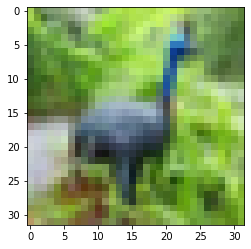

In [7]:
plot_img(6)

In [8]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

# DEVELOPING A MODEL USING SPARSE CATEGORICAL LOSS

In [9]:
model = keras.Sequential([keras.layers.Flatten(input_shape = (32, 32, 3)),keras.layers.Dense(1000,activation='relu'),
                          keras.layers.Dense(100,activation='relu'),keras.layers.Dense(10,activation='sigmoid')])

In [22]:
model.compile(optimizer = keras.optimizers.Adam(),loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [23]:
model.fit(x_train_scaled,y_train,epochs = 1)

1563/1563 [==============================] - 108s 66ms/step - loss: 1.4863 - accuracy: 0.4694


In [26]:
x_test_scaled[0].shape

(32, 32, 3)

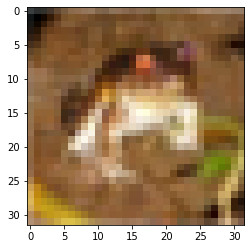

In [36]:
prediction_index = np.argmax(model.predict(x_test_scaled[:5])[3])
plot_img(prediction_index)

# DEVELOPING A MODEL USING CATEGORICAL CROSS ENTROPY

In [42]:
new_y_train = keras.utils.to_categorical(y_train,num_classes = 10,dtype='float32')

In [43]:
new_y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [44]:
new_model = keras.Sequential([keras.layers.Flatten(input_shape = (32, 32, 3)),keras.layers.Dense(1000,activation='relu'),keras.layers.Dense(100,activation='relu'),keras.layers.Dense(10,activation='sigmoid')]) 

In [49]:
new_model.compile(optimizer = keras.optimizers.Adam(),loss = 'categorical_crossentropy',metrics=['accuracy','AUC','MeanSquaredError'])

In [50]:
new_model.fit(x_train_scaled,new_y_train,epochs = 2)

Epoch 1/2
1563/1563 [==============================] - 112s 68ms/step - loss: 2.1401 - accuracy: 0.1735 - auc: 0.6827 - mean_squared_error: 0.25726s - loss: 2.1454 - accuracy: 0.1716 - auc: 0.68 - ETA: 4s - loss: 2.1441 - accuracy: 0.1720 - auc:  - ETA: 2s - loss: 2.1422 - accuracy: 0.1728 - auc: 
Epoch 2/2
1563/1563 [==============================] - 110s 70ms/step - loss: 1.9048 - accuracy: 0.2837 - auc: 0.7551 - mean_squared_error: 0.26886s - loss: 1.9109 - accuracy: 0.2803 - auc: 0.7531 - mean_squared_error:  - ETA: 6s - loss: 1.9103 - accuracy: 0.2807 - auc: 0.7532 - mean_squared_e - ETA: 5s - ETA: 0s - loss: 1.9047 - accuracy: 0.2837 - auc: 0.7551 - mean_squared_error: 0.2


In [71]:

%%timeit -n1 -r1
r = np.argmax(new_model.predict(x_test_scaled[:5])[1])
print(r)

8
203 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


8